<a href="https://colab.research.google.com/github/airamifta/HousePricePrediction/blob/main/House_Price_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang Masalah
Harga rumah memengaruhi stabilitas ekonomi secara signifikan. Fluktuasinya berdampak pada daya beli, konsumsi, dan nilai agunan. Namun, banyak studi hanya menyoroti faktor makro seperti suku bunga, tanpa mengeksplorasi secara detail pengaruh fitur mikro seperti lokasi dan ukuran rumah.

Untuk menjawab tantangan ini, digunakan dataset rumah di King County (2014–2015) yang mencakup fitur properti dan harga jual. Dengan pendekatan machine learning, studi ini menyajikan prediksi harga rumah yang akurat berbasis data nyata.

Paper Reference: House Price Prediction Based on Machine Learning: A Case of King County (https://www.atlantis-press.com/proceedings/icfied-22/125971834 - part of SpringerNature)


# Tujuan
Tujuan utama dari analisis dataset ini adalah:

1. Mengidentifikasi fitur properti yang paling berpengaruh terhadap harga jual rumah, terutama dari sisi mikro (lokasi, ukuran, kondisi bangunan).

2. Membangun model prediksi harga rumah berbasis machine learning dengan menggunakan:
    - Fitur numerik: sqft_living, sqft_lot, bedrooms, bathrooms, yr_built, yr_renovated

    - Fitur kategorikal: condition, grade, waterfront, view, floors, lat, long

    - Target: price (harga rumah)

3. Membandingkan performa beberapa algoritma regresi berdasarkan metrik seperti RMSE dan R².

4. Memberikan insight praktis kepada pembeli rumah, pengembang properti, dan pengambil kebijakan mengenai faktor utama penentu harga rumah yang dapat dijadikan referensi dalam keputusan pembelian dan pengembangan.

# Terkait Dataset

- Sumber Data: Kaggle (dihimpun oleh harlfoxem)
- Jumlah Sampel Data: 21.613 transaksi penjualan rumah
- Jumlah Atribut: 21 kolom (20 fitur + 1 target)
- Periode Pengambilan Data: Mei 2014 – Mei 2015
- Lokasi: King County, Washington, USA
- Cakupan Fitur:
  - Numerik kontinu: sqft_living, sqft_lot, lat, long, dll.
  - Kategorikal/discrete: jumlah kamar tidur, grade, kondisi, tahun renovasi, dll.
  - Target: harga penjualan rumah (price)

# Pendekatan Analisis
Untuk mendukung tujuan penelitian, dilakukan pendekatan komparatif terhadap model regresi prediktif dengan tahapan:

## Data Understanding

### Eksplorasi Awal

#### Load Library

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [ ]:
#Load Dataset
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
# Menampilkan 5 data teratas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- Pada tahap ini, kita akan menelaah data yang ada pada dataset `House in King
County`. Kita akan melihat informasi data, statistik deskriptif, dan distribusi data.

In [ ]:
# Menampilkan 5 data terbawah
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### Struktur Data

In [ ]:
# Melihat dimensi data
df.shape

(21613, 21)

#### Tipe Data

In [ ]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Statistik Deskriptif

In [ ]:
# Melihat deskripsi statistik
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Visualisasi Persebaran Data

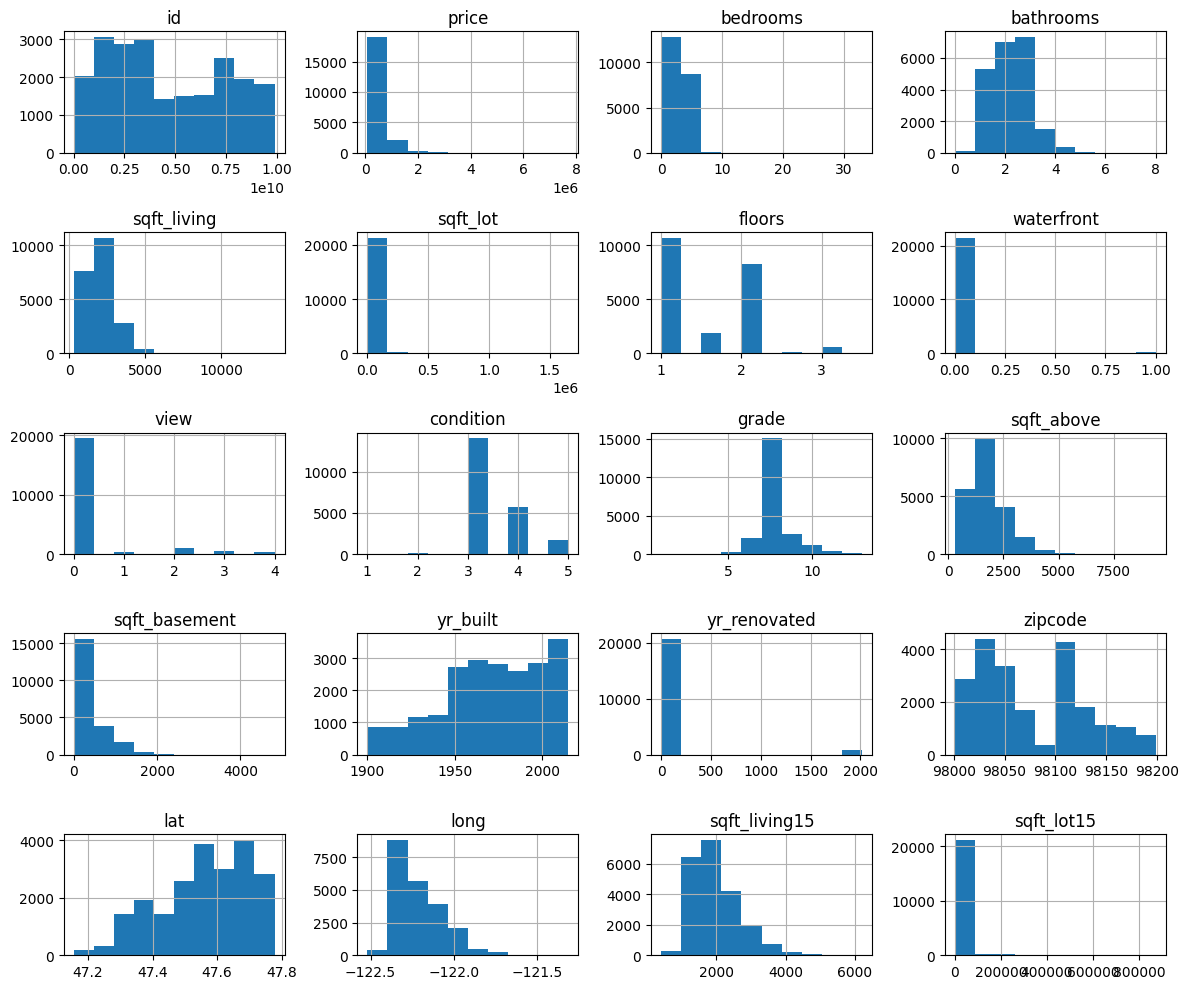

In [ ]:
# Menampilkan diagram histplot untuk semua fitur
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
# membuat fungsi untuk melakukan observasi pada dataset
def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Jumlah observasi: 21613
Jumlah variabel: 21
Kolom kategorikal: 4
Kolom Numerik: 16
Kategori tapi kardinal: 1
Numerik tapi kategorikal: 4


#### Visualisasi Fitur Kategorikal

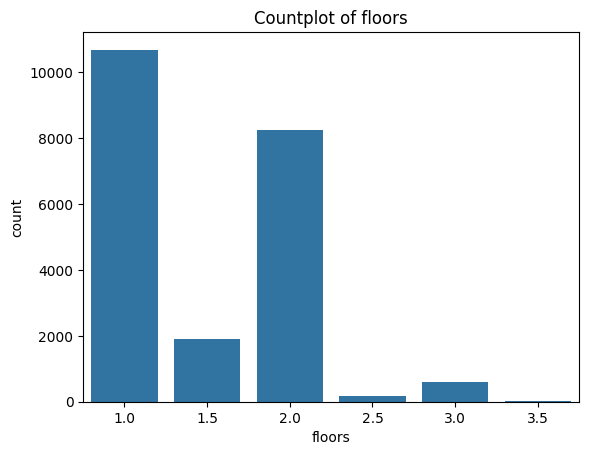

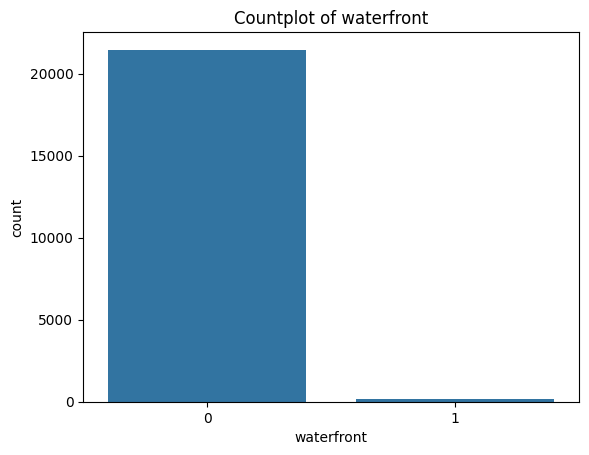

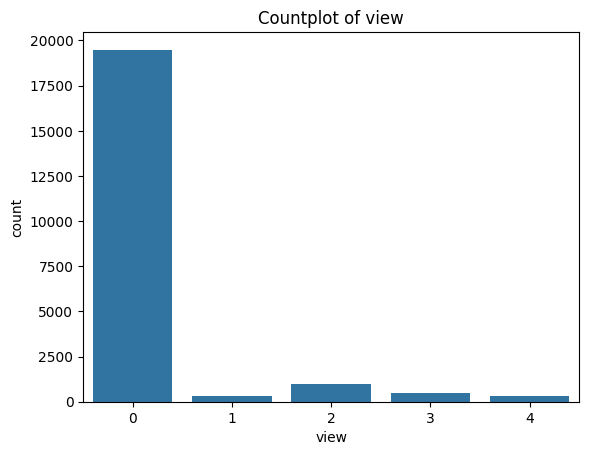

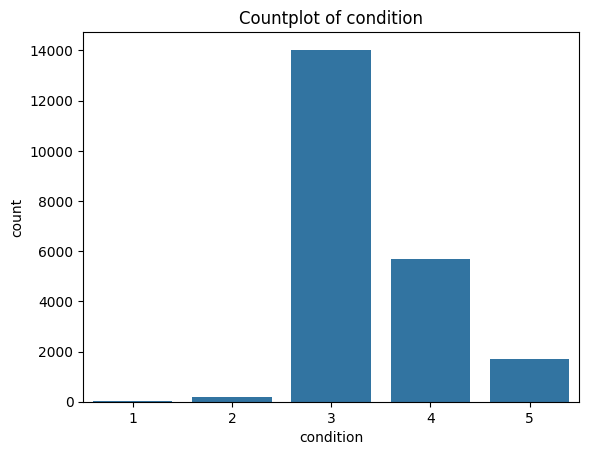

In [ ]:
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.show()

Bukan kategorikal tapi lebih ke fitur yang menggunakan range (misal: 1-5)

#### Visualisasi Fitur Numerik

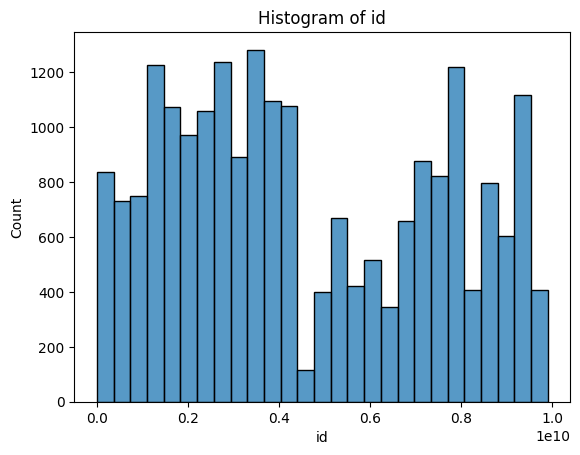

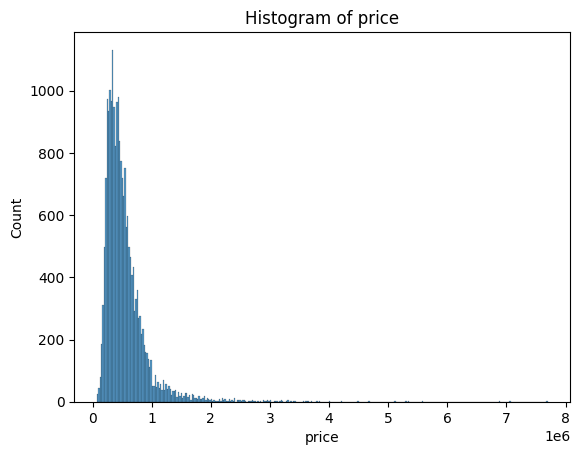

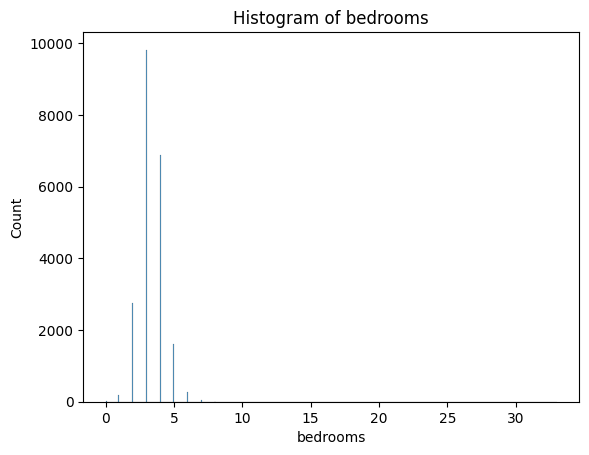

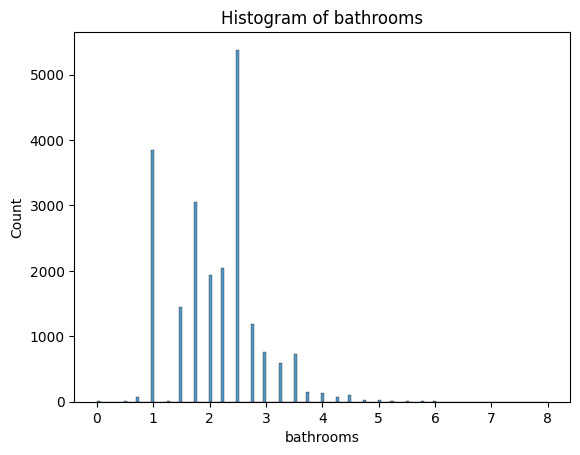

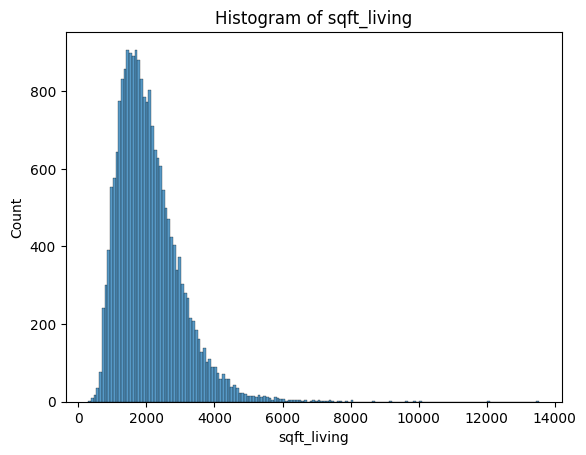

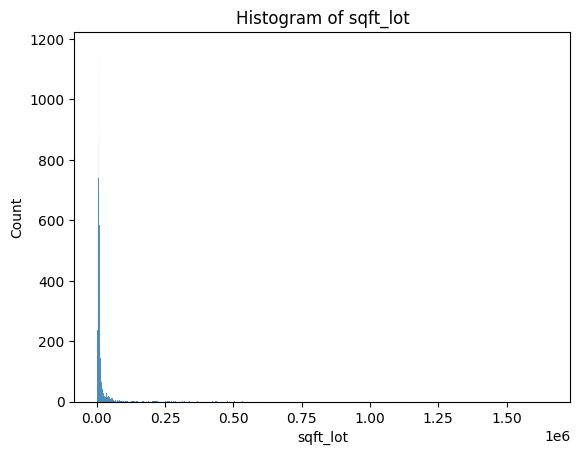

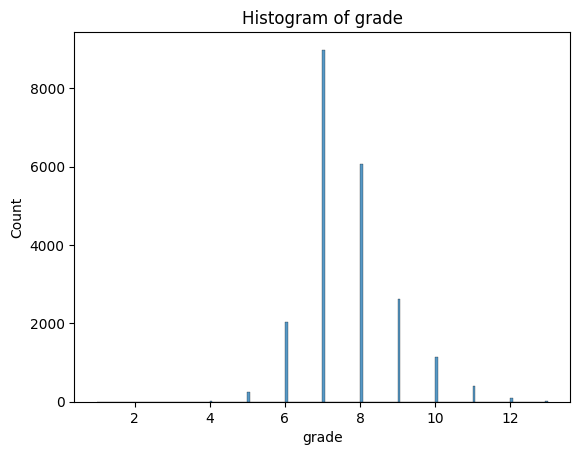

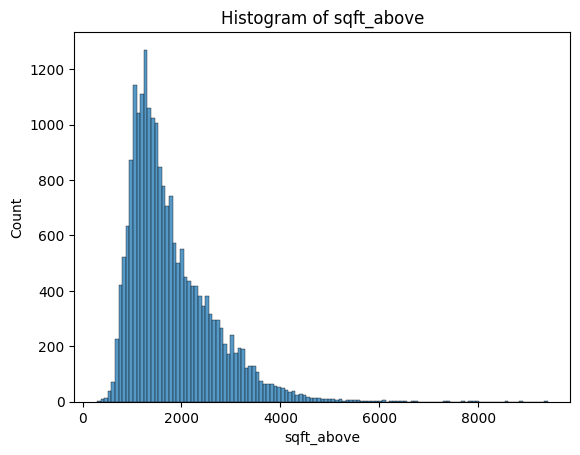

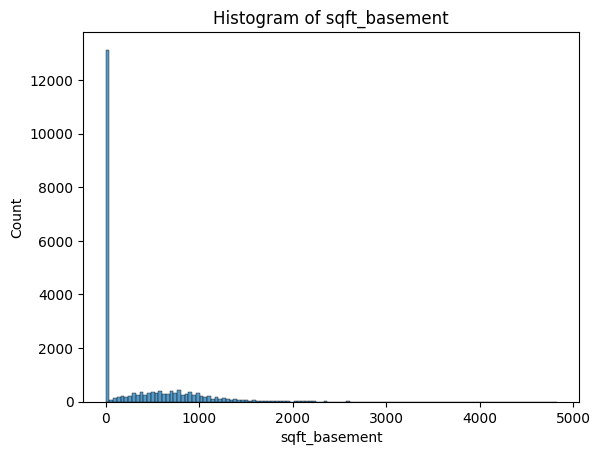

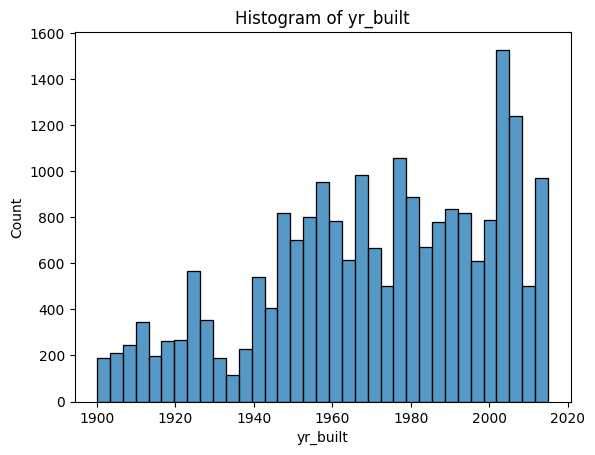

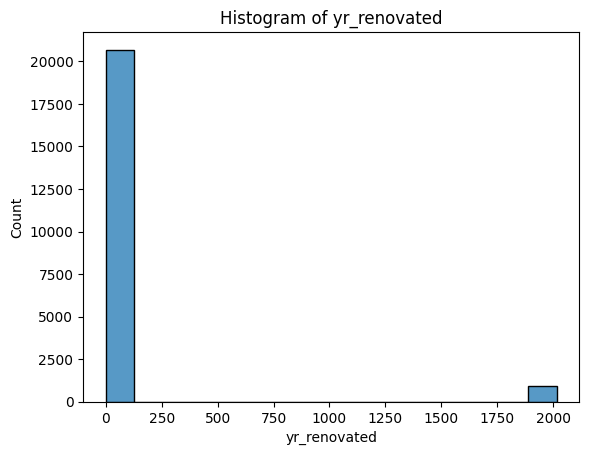

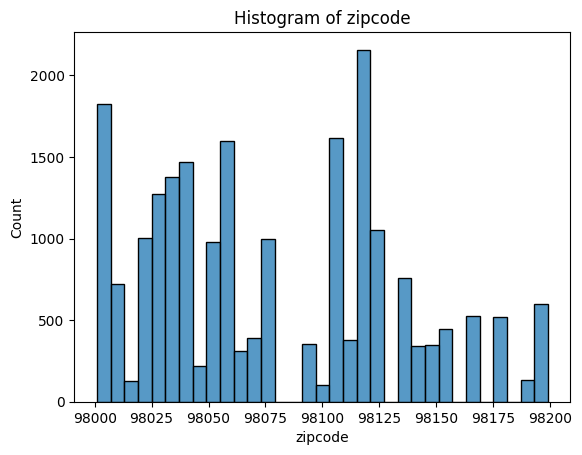

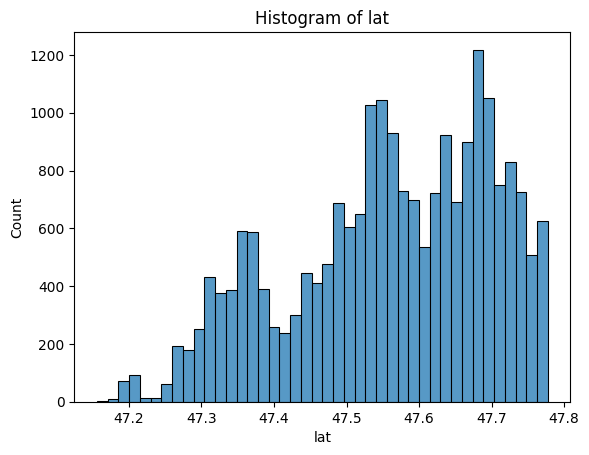

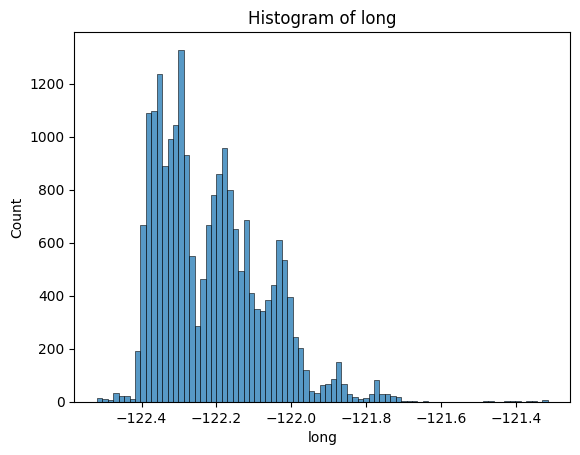

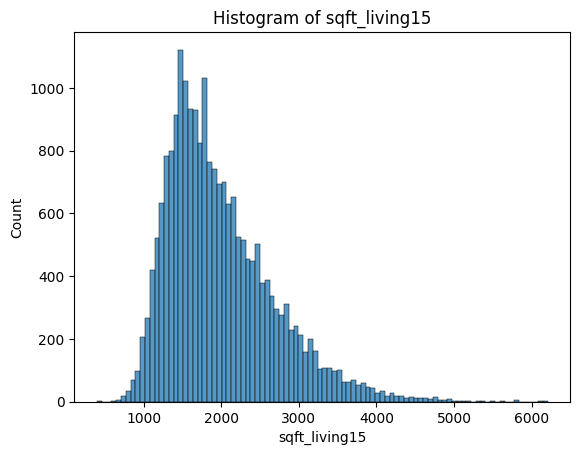

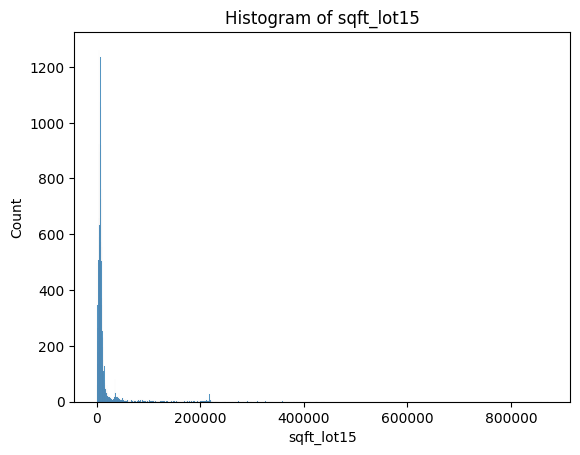

In [ ]:
for col in num_cols:
    sns.histplot(data=df, x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

### Validasi Dataset

#### Memeriksa Missing Value (Nilai Kosong)

In [ ]:
# Melihat missing value
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
# Melihat persebaran missing value
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


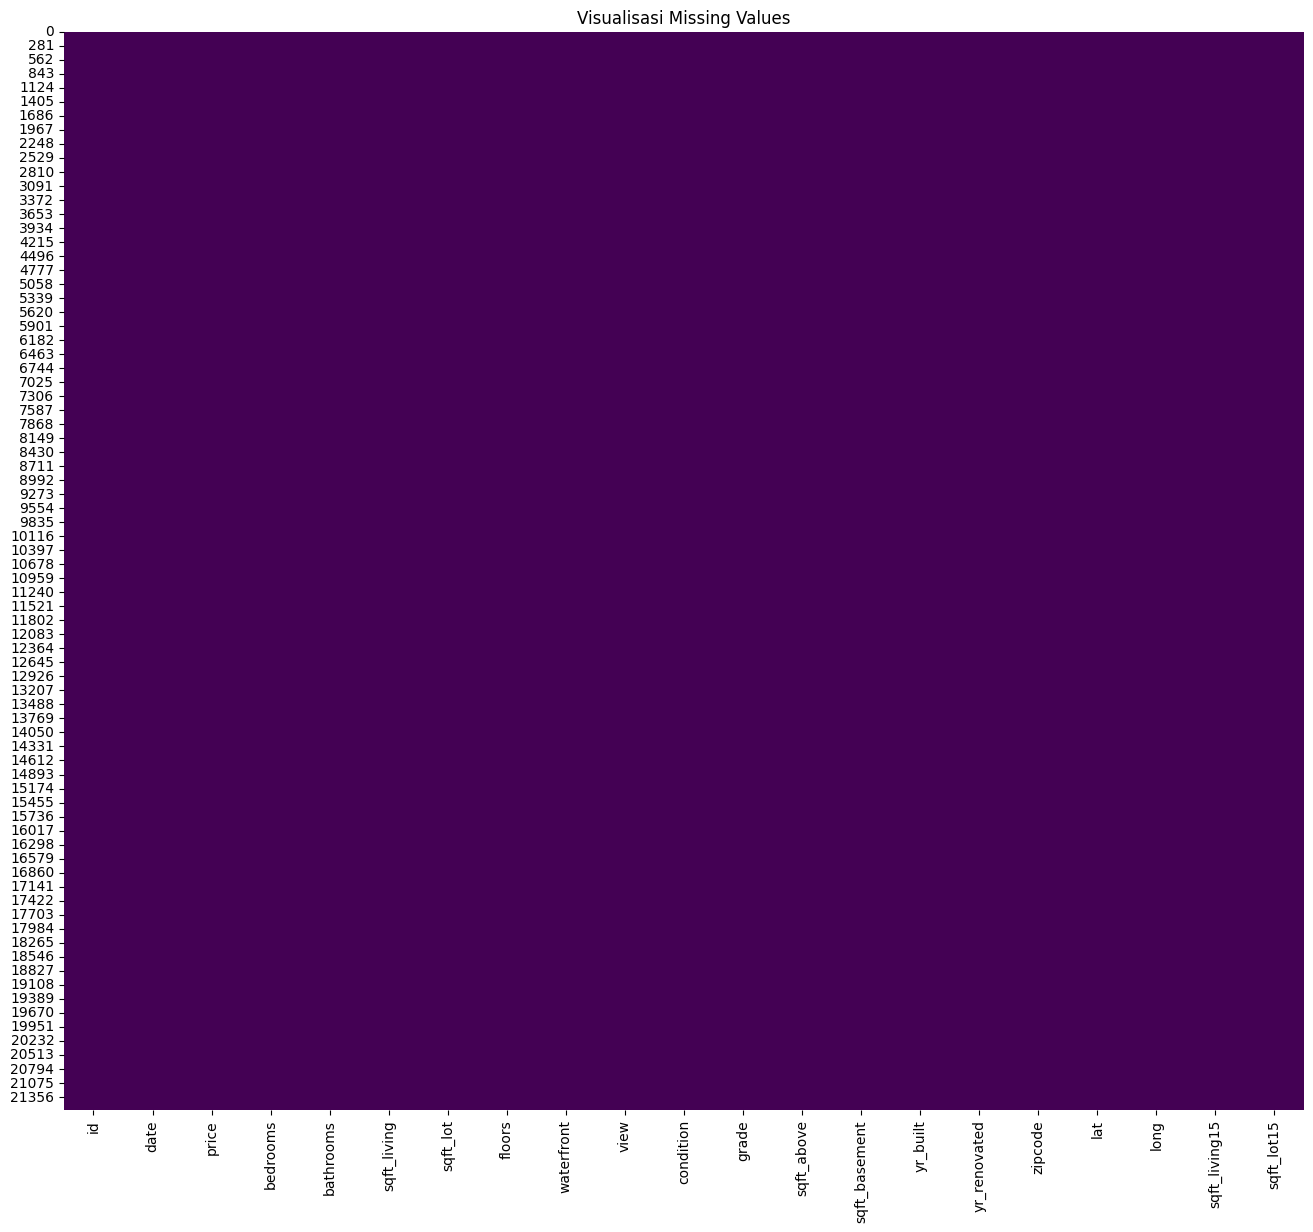

In [ ]:
# Visualisasi Missing Value
plt.figure(figsize=(16, 14))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

#### Memeriksa Data Duplikat

In [ ]:
# Cek jumlah duplikat
df.duplicated().sum()

np.int64(0)

In [ ]:
print("Duplikat:", df.duplicated().sum())

Duplikat: 0


#### Drop Fitur id dan date

In [ ]:
# Menghapus fitur yang tidak relevan untuk prediksi
df.drop(['id', 'date'], axis=1, inplace=True)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Jumlah observasi: 21613
Jumlah variabel: 19
Kolom kategorikal: 4
Kolom Numerik: 15
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 4


#### Memeriksa Nilai Unique

In [ ]:
# Cek nilai unik
df.nunique()

,0
price,4028
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5
condition,5
grade,12


In [ ]:
for col in df.columns:
 print(f'{col}')
 print(f'Jumlah nilai yang unik: {df[col].nunique()}')
 print(f'Nilai yang paling sering muncul (modus): {df[col].mode().values[0]}')
 print(f'{df[col].unique()}\n')

price
Jumlah nilai yang unik: 4028
Nilai yang paling sering muncul (modus): 350000.0
[ 221900.  538000.  180000. ...  610685. 1007500.  402101.]

bedrooms
Jumlah nilai yang unik: 13
Nilai yang paling sering muncul (modus): 3
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]

bathrooms
Jumlah nilai yang unik: 30
Nilai yang paling sering muncul (modus): 2.5
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]

sqft_living
Jumlah nilai yang unik: 1038
Nilai yang paling sering muncul (modus): 1300
[1180 2570  770 ... 3087 3118 1425]

sqft_lot
Jumlah nilai yang unik: 9782
Nilai yang paling sering muncul (modus): 5000
[ 5650  7242 10000 ...  5813  2388  1076]

floors
Jumlah nilai yang unik: 6
Nilai yang paling sering muncul (modus): 1.0
[1.  2.  1.5 3.  2.5 3.5]

waterfront
Jumlah nilai yang unik: 2
Nilai yang paling sering muncul (modus): 0
[0 1]

view
Jumlah nilai yang unik: 5
Nilai yang paling seri

### Pembersihan Data

#### Mendeteksi Outlier

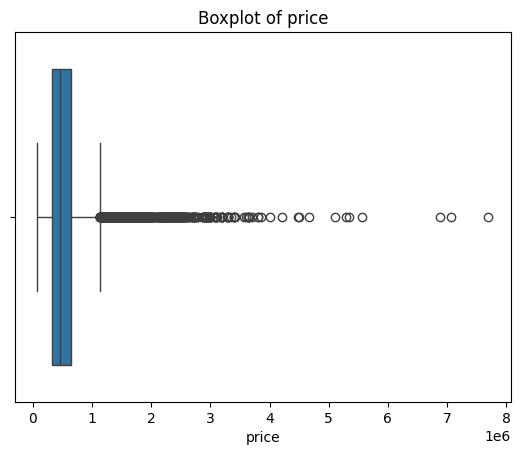

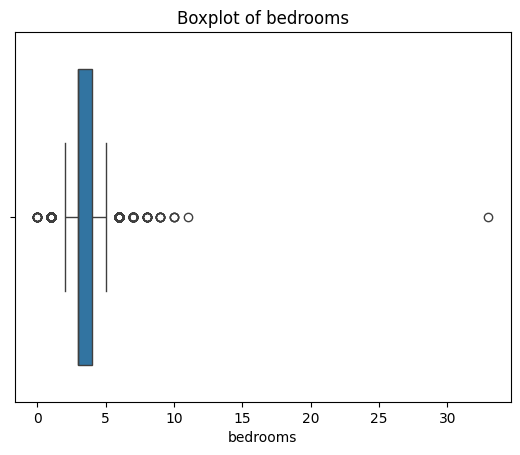

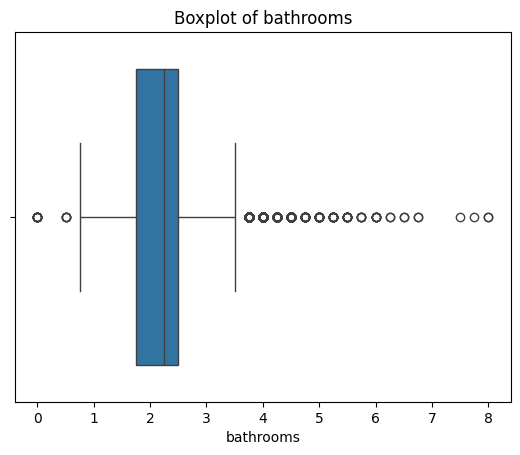

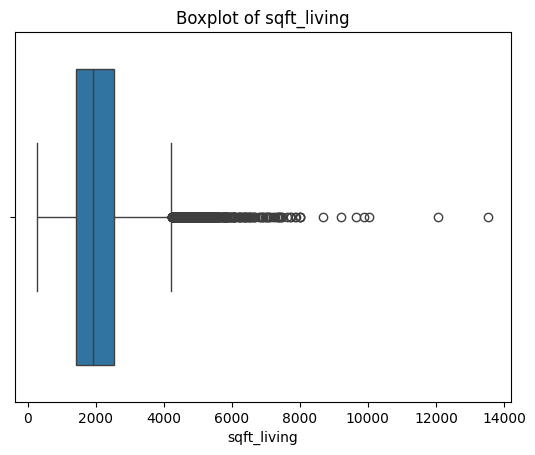

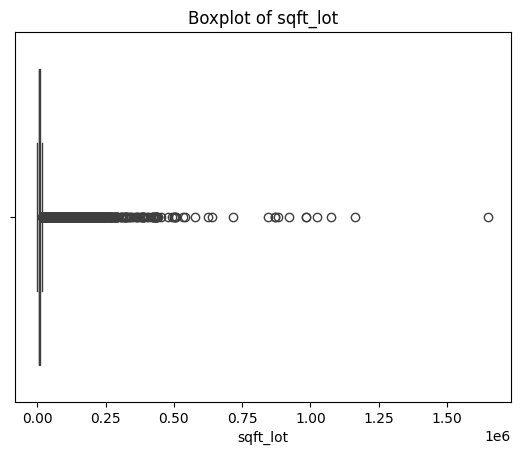

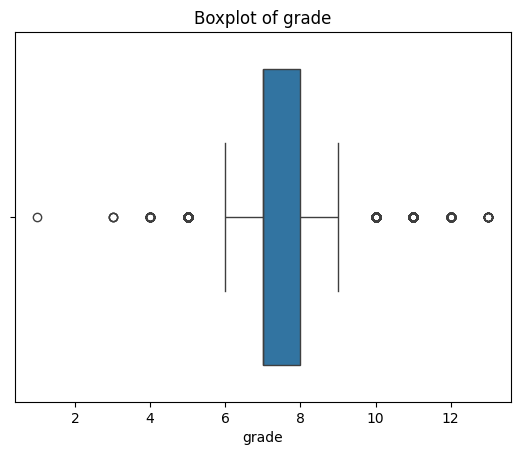

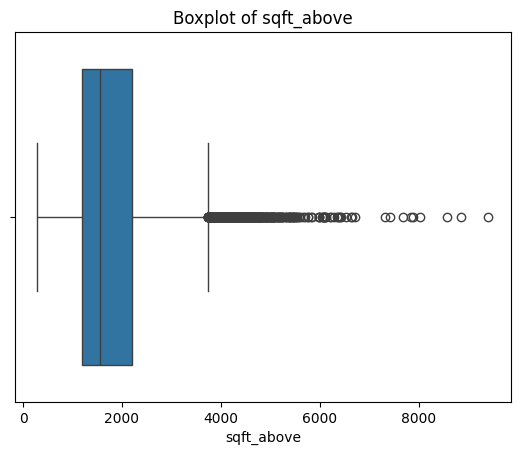

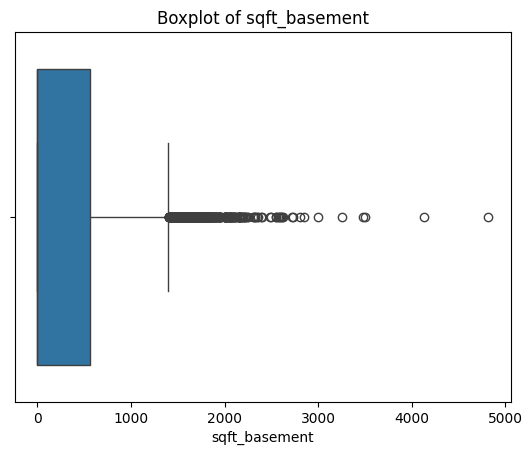

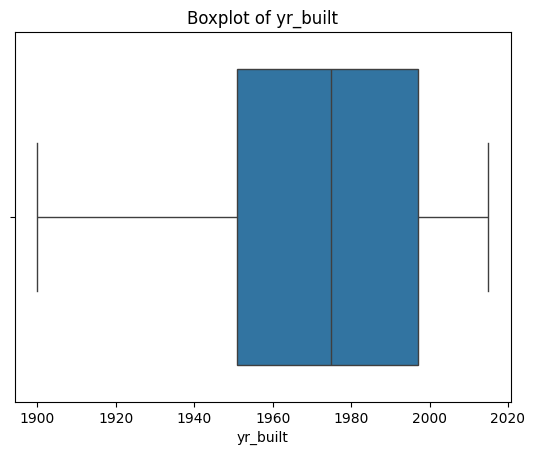

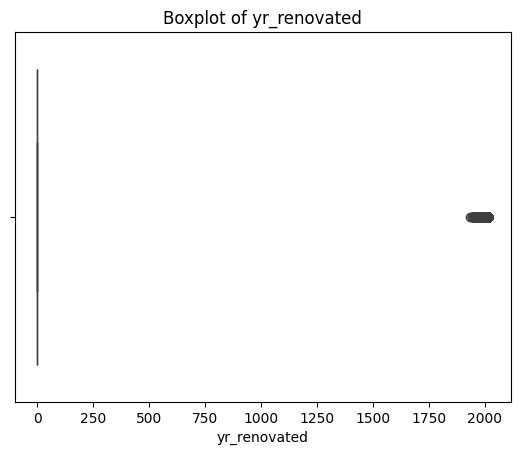

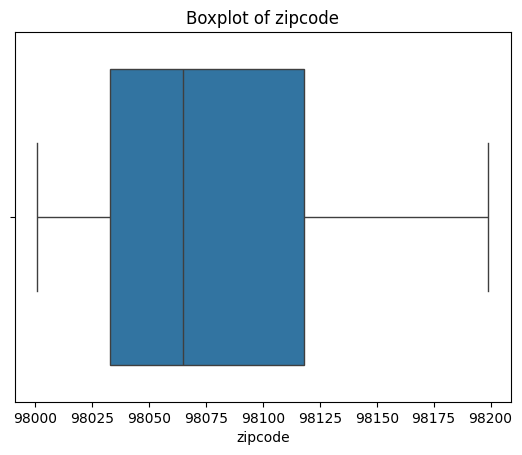

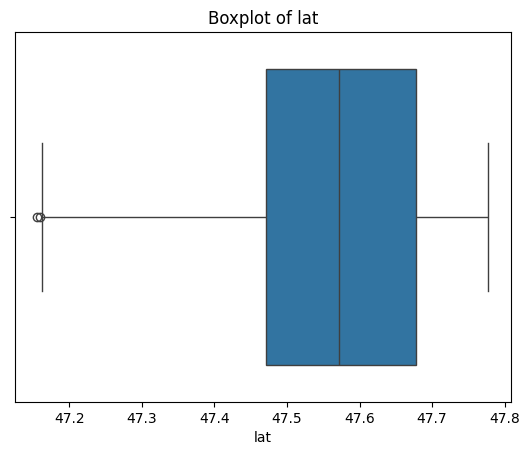

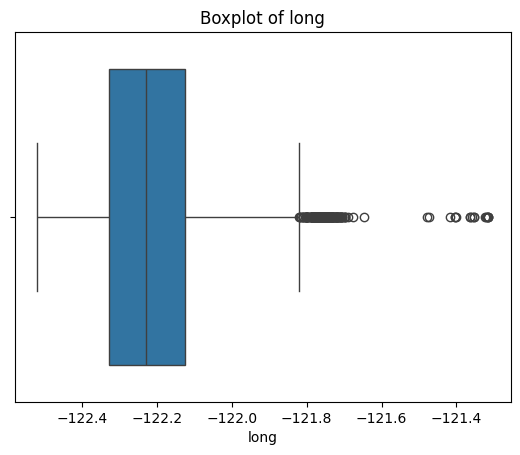

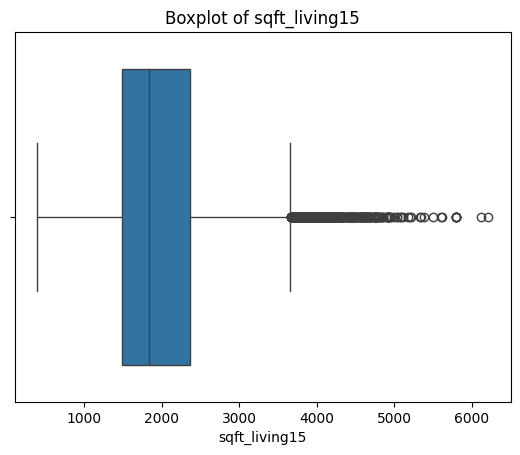

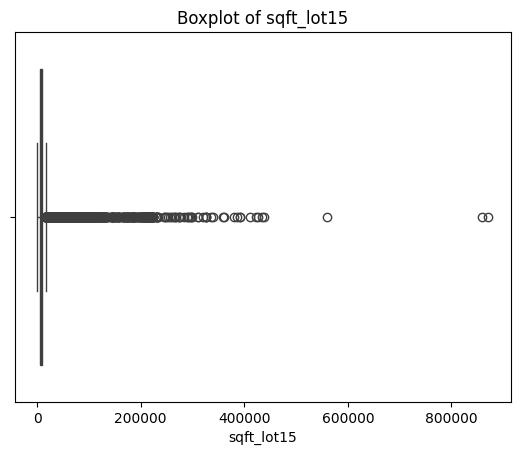

In [ ]:
# Cek outlier dengan visualisasi
for col in num_cols:
    boxplot = sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Handling Outlier

In [ ]:
# Buat salinan dataframe
data_cleaned = df.copy()

In [ ]:
# Handling kolom numerik
iqr_cols = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
    'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'
]

for col in iqr_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

    print(f"{col} -> min: {data_cleaned[col].min():.2f}, max: {data_cleaned[col].max():.2f}, lower_bound: {lower_bound:.2f}, upper_bound: {upper_bound:.2f}")

bedrooms -> min: 1.50, max: 5.50, lower_bound: 1.50, upper_bound: 5.50
bathrooms -> min: 0.62, max: 3.62, lower_bound: 0.62, upper_bound: 3.62
sqft_living -> min: 290.00, max: 4234.50, lower_bound: -257.50, upper_bound: 4234.50
sqft_lot -> min: 520.00, max: 19160.00, lower_bound: -3432.00, upper_bound: 19160.00
floors -> min: 1.00, max: 3.50, lower_bound: -0.50, upper_bound: 3.50
sqft_above -> min: 290.00, max: 3740.00, lower_bound: -340.00, upper_bound: 3740.00
sqft_basement -> min: 0.00, max: 1400.00, lower_bound: -840.00, upper_bound: 1400.00
yr_built -> min: 1900.00, max: 2015.00, lower_bound: 1882.00, upper_bound: 2066.00
yr_renovated -> min: 0.00, max: 0.00, lower_bound: 0.00, upper_bound: 0.00
lat -> min: 47.16, max: 47.78, lower_bound: 47.16, upper_bound: 47.99
long -> min: -122.52, max: -121.82, lower_bound: -122.63, upper_bound: -121.82
sqft_living15 -> min: 399.00, max: 3665.00, lower_bound: 185.00, upper_bound: 3665.00
sqft_lot15 -> min: 651.00, max: 17557.50, lower_bound: 

Handling nilai unik menggunakan IQR dilakukan karena metode ini efektif mengatasi outlier yang muncul dari nilai-nilai ekstrem. Dengan membatasi nilai di luar batas normal, model menjadi lebih stabil dan tidak terpengaruh oleh data yang jarang muncul atau menyimpang.

In [ ]:
df = data_cleaned

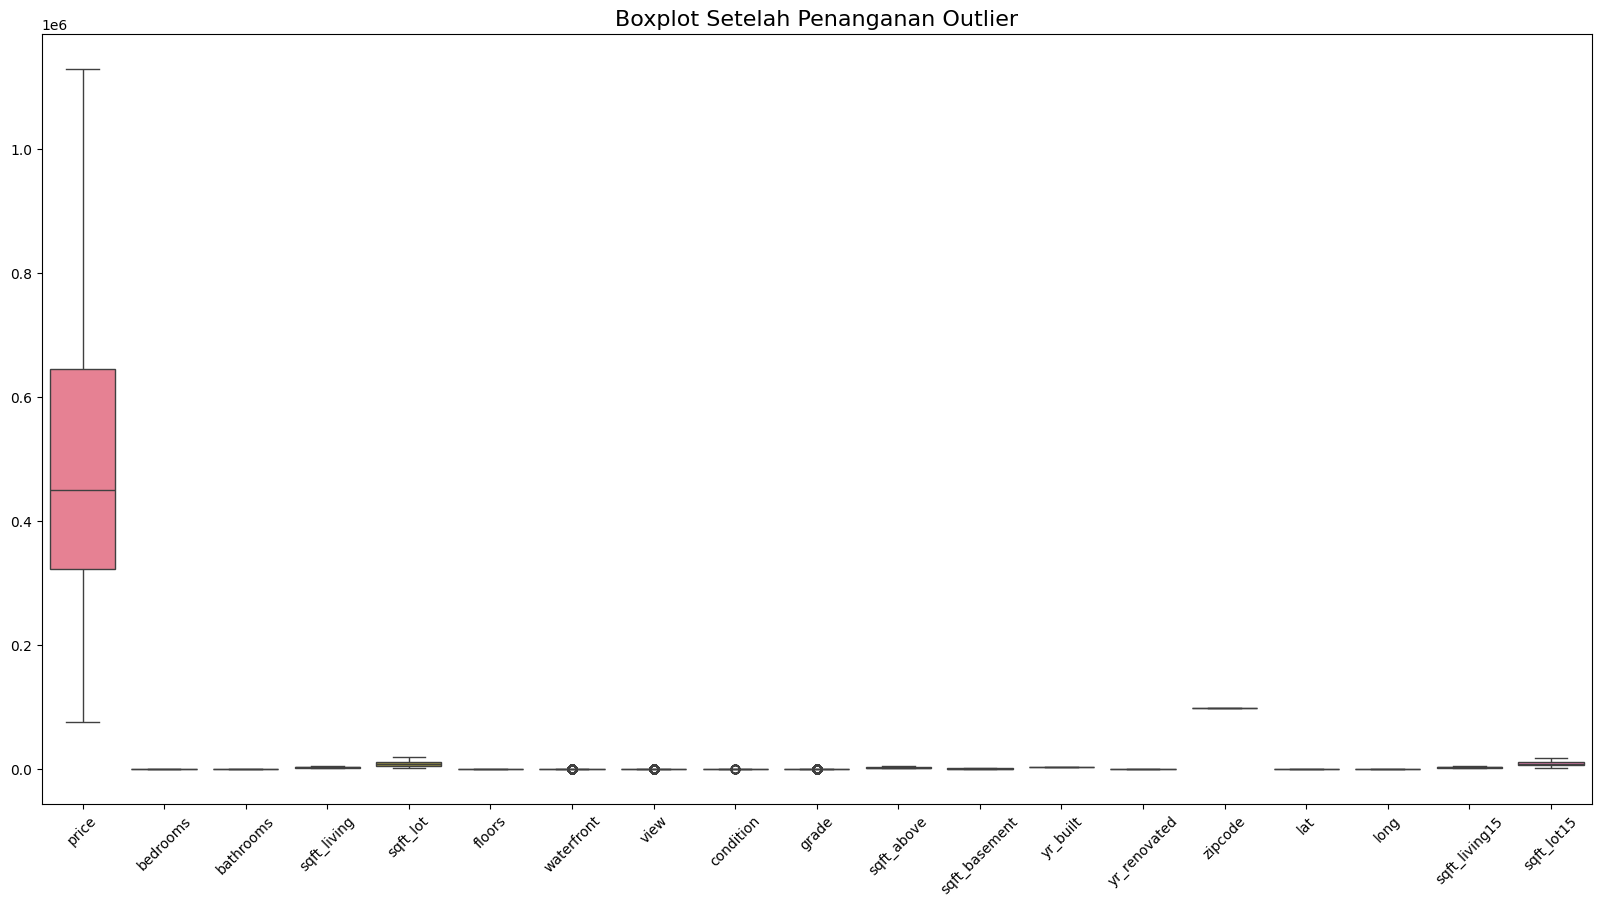

In [ ]:
# Cek outlier dengan visualisasi
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_cleaned)
plt.title('Boxplot Setelah Penanganan Outlier', fontsize=16)
plt.xticks(rotation=45)
plt.show()

#### Persebaran Data

price
1129575.0    1146
350000.0      172
450000.0      172
550000.0      159
500000.0      152
             ... 
285650.0        1
154200.0        1
787000.0        1
280400.0        1
945800.0        1
Name: count, Length: 3544, dtype: int64


<Axes: xlabel='price', ylabel='count'>

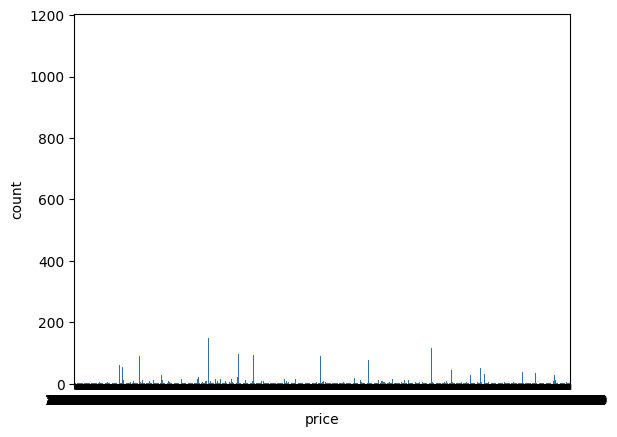

In [ ]:
# Melihat persebaran data
print(df['price'].value_counts())
sns.countplot(data=df, x='price')

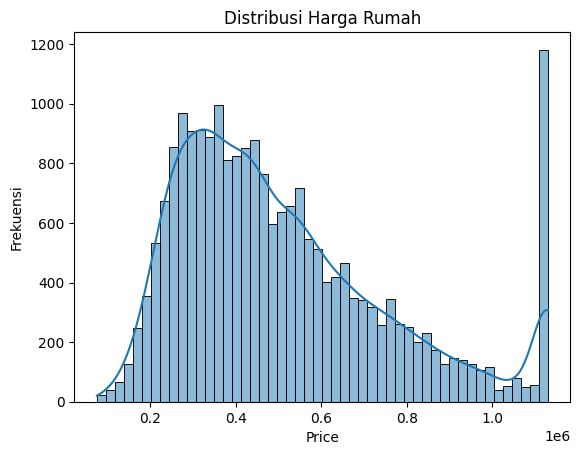

In [ ]:
# Visualisasi harga
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.show()

#### Heatmap Korelasi

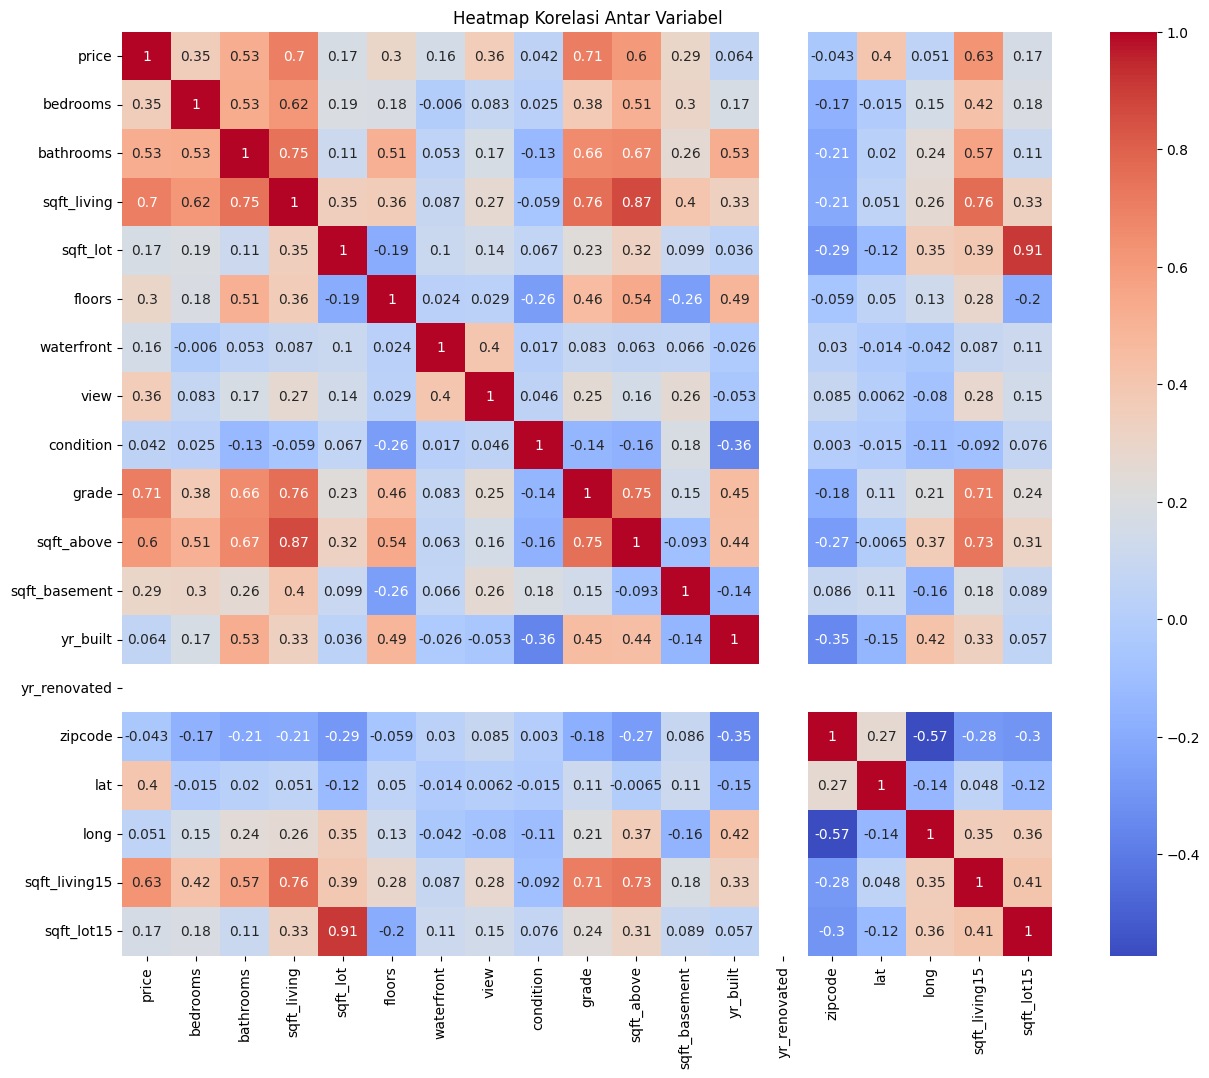

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Heatmap tampak kosong karena ada kolom seperti `yr_renovated` yang nilainya konstan atau minim variasi, sehingga korelasi Pearson tidak bisa dihitung dan menghasilkan nilai NaN, membuat sel-sel terkait tidak terwarnai.


In [ ]:
# Menangani kolom yr_renovated agar tidak kosong
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
df_fitur = df.copy()

## Data Preparation

### Splitting

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Membagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
print("dimensi X_train:", X_train.shape)
print("dimensi y_train:", y_train.shape)
print("dimensi X_test:", X_test.shape)
print("dimensi y_test:", y_test.shape)

dimensi X_train: (17290, 18)
dimensi y_train: (17290,)
dimensi X_test: (4323, 18)
dimensi y_test: (4323,)


In [ ]:
y_train

,price
6325,325000.0
13473,257000.0
17614,228500.0
16970,288000.0
20868,479000.0
...,...
11964,378000.0
21575,399950.0
5390,575000.0
860,245000.0


### Normalisasi

In [ ]:
ordinal_cols = ['view', 'condition', 'grade']
scaler = StandardScaler()
data_cleaned[ordinal_cols] = scaler.fit_transform(data_cleaned[ordinal_cols])

Kolom `view`, `condition`, dan `grade` memiliki urutan nilai yang mencerminkan kualitas atau kondisi, sehingga cocok dinormalisasi menggunakan `StandardScaler`. Normalisasi ini dilakukan agar skala nilainya seragam dan tidak mendominasi proses pelatihan model, terutama jika dibandingkan dengan fitur lain yang memiliki skala lebih kecil.

In [ ]:
data_cleaned['waterfront'] = data_cleaned['waterfront'].astype('category')
data_cleaned['zipcode'] = data_cleaned['zipcode'].astype('category')

Sementara itu, `waterfront` dan `zipcode` diubah ke tipe kategori karena berisi data kategorikal, seperti nilai 0/1 atau kode wilayah. Perubahan ini penting agar data tersebut diperlakukan sebagai label diskrit, bukan angka kontinu, sehingga tidak menyesatkan analisis maupun model prediksi.

## Model Evaluasi

### Decision Tree

In [ ]:
# Inisialisasi model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

=== Decision Tree Regressor ===
MSE: 16034041007.44
R2 (Training): 0.77
R2 (Testing): 0.75


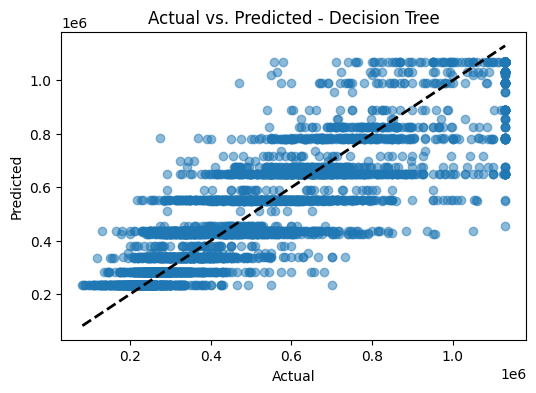

In [ ]:
# Prediksi
y_dt_pred = dt_model.predict(X_test)

# Evaluasi
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2_test = r2_score(y_test, y_dt_pred)
dt_r2_train = r2_score(y_train, dt_model.predict(X_train))

print("=== Decision Tree Regressor ===")
print(f"MSE: {dt_mse:.2f}")
print(f"R2 (Training): {dt_r2_train:.2f}")
print(f"R2 (Testing): {dt_r2_test:.2f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_dt_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - Decision Tree")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### Random Forest

In [ ]:
# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

=== Random Forest Regressor ===
MSE: 6906262406.72
R2 (Training): 0.98
R2 (Testing): 0.89


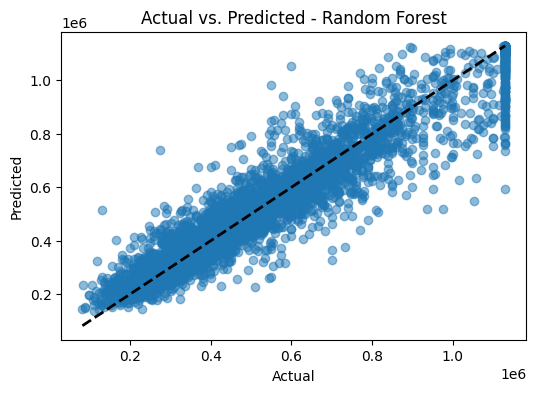

In [ ]:
# Prediksi
y_rf_pred = rf_model.predict(X_test)

# Evaluasi
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2_test = r2_score(y_test, y_rf_pred)
rf_r2_train = r2_score(y_train, rf_model.predict(X_train))

print("=== Random Forest Regressor ===")
print(f"MSE: {rf_mse:.2f}")
print(f"R2 (Training): {rf_r2_train:.2f}")
print(f"R2 (Testing): {rf_r2_test:.2f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### KNN

In [ ]:
# Inisialisasi model
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

=== KNN Regressor ===
MSE: 27000321383.23
R2 (Training): 0.66
R2 (Testing): 0.58


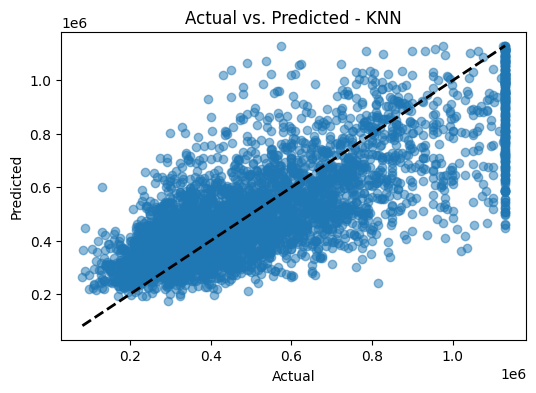

In [ ]:
# Prediksi
y_knn_pred = knn_model.predict(X_test)

# Evaluasi
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2_test = r2_score(y_test, y_knn_pred)
knn_r2_train = r2_score(y_train, knn_model.predict(X_train))

print("=== KNN Regressor ===")
print(f"MSE: {knn_mse:.2f}")
print(f"R2 (Training): {knn_r2_train:.2f}")
print(f"R2 (Testing): {knn_r2_test:.2f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_knn_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - KNN")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Kesimpulan


Dari tiga model yang diuji, Random Forest Regressor memberikan hasil terbaik dengan performa sebagai berikut:

R² Training: 0.98

R² Testing: 0.89

Model ini lebih akurat dan stabil dibandingkan Decision Tree (R² Test: 0.73) dan KNN (R² Test: 0.64), sehingga paling efektif digunakan untuk memprediksi harga rumah pada dataset King County.

## Simpan PKL

### Simpan Model

In [ ]:
import joblib

# Simpan model
joblib.dump(rf_model, 'model_rumah.pkl')

['model_rumah.pkl']

In [ ]:
# Simpan scaler
joblib.dump(scaler, 'scaler_rumah.pkl')

['scaler_rumah.pkl']

## Contoh Streamlit

In [ ]:
import joblib
import numpy as np
import pandas as pd

# === Penjelasan Fitur Input ===
print("Masukkan data properti:")
print("- bedrooms: Jumlah kamar tidur (contoh: 3)")
print("- bathrooms: Jumlah kamar mandi (contoh: 2)")
print("- sqft_living: Luas bangunan utama (contoh: 2000)")
print("- sqft_lot: Luas tanah (contoh: 5000)")
print("- floors: Jumlah lantai (contoh: 1.5)")
print("- waterfront: 0 jika tidak menghadap laut, 1 jika ya")
print("- view: Pemandangan (0-4)")
print("- condition: Kondisi rumah (1-5)")
print("- grade: Kualitas rumah (1-13)")
print("- sqft_above: Luas lantai atas (contoh: 1800)")
print("- sqft_basement: Luas basement (contoh: 200)")
print("- yr_built: Tahun dibangun (contoh: 1990)")
print("- yr_renovated: Tahun renovasi (0 jika belum pernah direnovasi)")
print("- zipcode: Kode pos (contoh: 98178)")
print("- lat: Latitude lokasi rumah")
print("- long: Longitude lokasi rumah")
print("- sqft_living15: Luas rata-rata rumah sekitar (contoh: 1500)")
print("- sqft_lot15: Luas rata-rata tanah sekitar (contoh: 4000)")

# === Input Manual ===
bedrooms = int(input("bedrooms: "))
bathrooms = float(input("bathrooms: "))
sqft_living = int(input("sqft_living: "))
sqft_lot = int(input("sqft_lot: "))
floors = float(input("floors: "))
waterfront = int(input("waterfront (0/1): "))
view = int(input("view (0-4): "))
condition = int(input("condition (1-5): "))
grade = int(input("grade (1-13): "))
sqft_above = int(input("sqft_above: "))
sqft_basement = int(input("sqft_basement: "))
yr_built = int(input("yr_built: "))
yr_renovated = int(input("yr_renovated: "))
zipcode = int(input("zipcode: "))
lat = float(input("latitude: "))
long = float(input("longitude: "))
sqft_living15 = int(input("sqft_living15: "))
sqft_lot15 = int(input("sqft_lot15: "))

# === Nama kolom fitur ===
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'waterfront', 'view', 'condition', 'grade',
                 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# === Buat DataFrame 1 baris input ===
input_df = pd.DataFrame([[bedrooms, bathrooms, sqft_living, sqft_lot, floors,
                          waterfront, view, condition, grade,
                          sqft_above, sqft_basement, yr_built, yr_renovated,
                          zipcode, lat, long, sqft_living15, sqft_lot15]],
                        columns=feature_names)

# === Load Scaler & Transform view, condition, grade ===
try:
    scaler = joblib.load('scaler_rumah.pkl')
    input_df[['view', 'condition', 'grade']] = scaler.transform(input_df[['view', 'condition', 'grade']])
except:
    print("Scaler tidak ditemukan atau gagal diterapkan. Lewatkan scaling.")

# === Load Model ===
model = joblib.load('model_rumah.pkl')

# === Prediksi ===
predicted_price = model.predict(input_df)[0]
print(f"\nPrediksi Harga Rumah: ${int(predicted_price):,}")

Masukkan data properti:
- bedrooms: Jumlah kamar tidur (contoh: 3)
- bathrooms: Jumlah kamar mandi (contoh: 2)
- sqft_living: Luas bangunan utama (contoh: 2000)
- sqft_lot: Luas tanah (contoh: 5000)
- floors: Jumlah lantai (contoh: 1.5)
- waterfront: 0 jika tidak menghadap laut, 1 jika ya
- view: Pemandangan (0-4)
- condition: Kondisi rumah (1-5)
- grade: Kualitas rumah (1-13)
- sqft_above: Luas lantai atas (contoh: 1800)
- sqft_basement: Luas basement (contoh: 200)
- yr_built: Tahun dibangun (contoh: 1990)
- yr_renovated: Tahun renovasi (0 jika belum pernah direnovasi)
- zipcode: Kode pos (contoh: 98178)
- lat: Latitude lokasi rumah
- long: Longitude lokasi rumah
- sqft_living15: Luas rata-rata rumah sekitar (contoh: 1500)
- sqft_lot15: Luas rata-rata tanah sekitar (contoh: 4000)
bedrooms: 3
bathrooms: 2
sqft_living: 2000
sqft_lot: 5000
floors: 1.5
waterfront (0/1): 0
view (0-4): 0
condition (1-5): 5
grade (1-13): 10
sqft_above: 1800
sqft_basement: 200
yr_built: 2015
yr_renovated: 2
z